In [1]:
# ! rm -rf scikit-learn-som
! git clone https://github.com/abbasidaniyal/scikit-learn-som.git

Cloning into 'scikit-learn-som'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 56 (delta 20), reused 42 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 2.02 MiB | 26.91 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [2]:
%%writefile /kaggle/working/scikit-learn-som/pyproject.toml
[project]
name = "scikit-learn-som"
version = "0.0.3"
description = ""
readme = "README.md"
requires-python = ">=3.11"
dependencies = [
    "scikit-learn>=1.6.1",
]

[dependency-groups]
dev = [
    "ipython>=9.1.0",
    "jupyter>=1.1.1",
    "matplotlib>=3.10.1",
    "keras>=3.9.2",
    "optuna>=4.3.0",
    "tensorflow>=2.19.0",
    "pytest>=8.3.5",
    "coverage>=7.8.0",
    "typing-extensions>=4.13.2",
]


Overwriting /kaggle/working/scikit-learn-som/pyproject.toml


In [3]:
! pip install -e scikit-learn-som/

Obtaining file:///kaggle/working/scikit-learn-som
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 75.8 MB/s eta 0:00:00:00:010:01
  Building editable for scikit-learn-som (pyproject.toml) ... done
  Created wheel for scikit-learn-som: filename=scikit_learn_som-0.0.3-0.editable-py3-none-any.whl size=1343 sha256=e0ab550d11cad1270f338cd159b298aadd7b382e5b72a5ae624a9ec18f9f15f8
  Stored in directory: /tmp/pip-ephem-wheel-cache-1rntpsi_/wheels/d7/75/b2/cac6eedb8950f4ed28944143f1389fc0b10d6be99906f1a7be
Successfully built scikit-learn-som
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into accoun

In [5]:
import sys
import os

# Basic
import numpy as np
import numpy as np
def dummy_npwarn_decorator_factory():
  def npwarn_decorator(x):
    return x
  return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)
import matplotlib.pyplot as plt

# Dataset
from keras.datasets import fashion_mnist

# Evaluation
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


sys.path.append("/kaggle/working/scikit-learn-som/src")  # adjust path


# Your SOM model
from som import SOM


In [6]:
# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Flatten images from (28,28) to (784,)
X_train = X_train.reshape(-1, 28*28).astype(np.float32) / 255.0
X_test = X_test.reshape(-1, 28*28).astype(np.float32) / 255.0

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape: (60000, 784)
Test shape: (10000, 784)


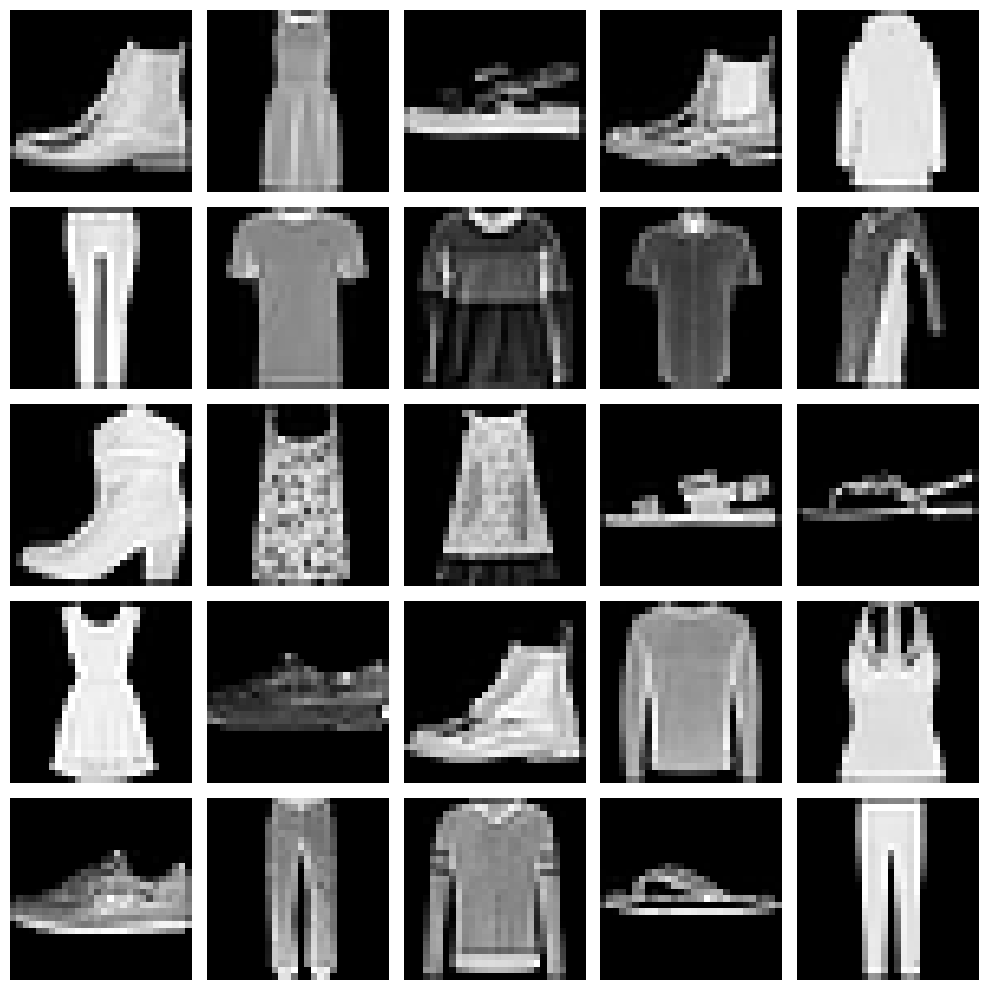

In [7]:
import matplotlib.pyplot as plt
import numpy as np

num_samples = 25  # you can change this
grid_size = int(num_samples ** 0.5)

# randomly select 25 samples from X_train
indices = np.random.choice(len(X_train), size=num_samples, replace=False)
selected_samples = X_train[indices]

fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
axes = axes.flatten()

for ax, neuron_weights in zip(axes, selected_samples.reshape(-1, 784)):
    img = neuron_weights.reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [8]:
# Initialize SOM
som = SOM(
    lattice_rows=5,
    lattice_columns=5,
    initial_learning_rate=1,
    neighbourhood_radius=3,
    max_iters=1000,
    learning_rate_type="exponential",
    random_state=42,
    lattice_type="hexagonal",
    use_tqdm=True
)

# Fit SOM
som.fit(X_train)


100%|██████████| 1000/1000 [1:00:21<00:00,  3.62s/it]


SOM(lattice_columns=5, lattice_rows=5, lattice_type='hexagonal', max_iters=1000,
    neighbourhood_radius=3, random_state=42, use_tqdm=True)

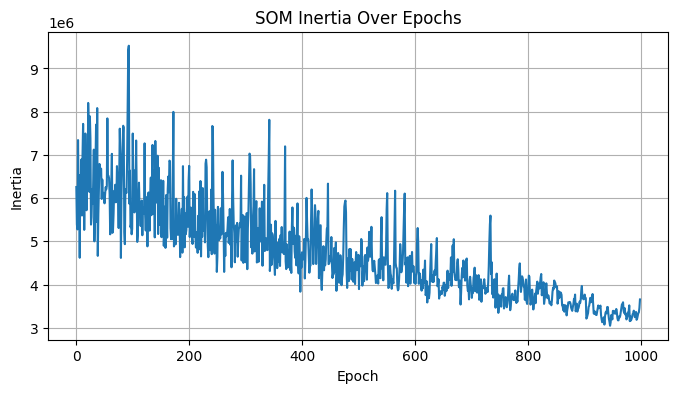

In [9]:
som.plot_inertia()

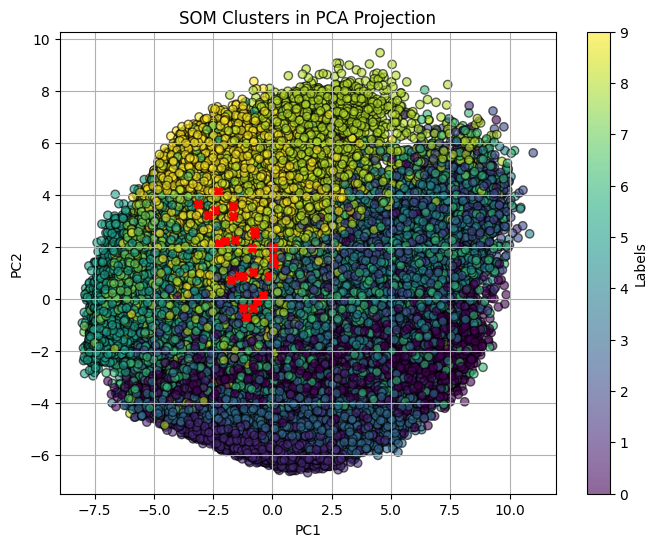

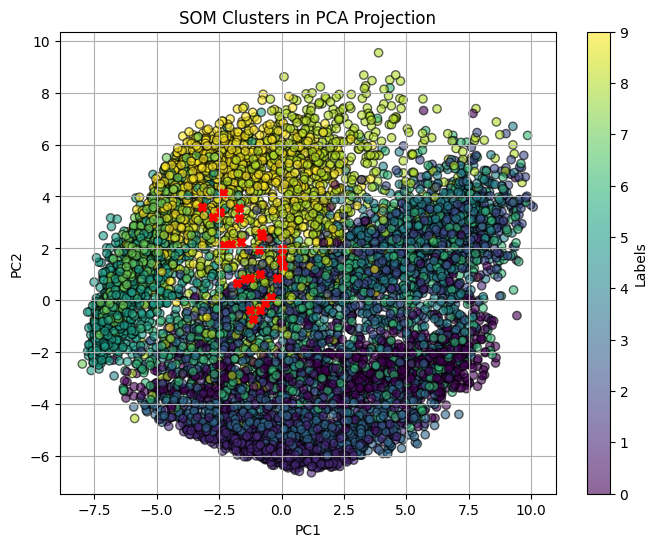

In [10]:
som.plot_clusters(X_train, y_train)
som.plot_clusters(X_test, y_test)

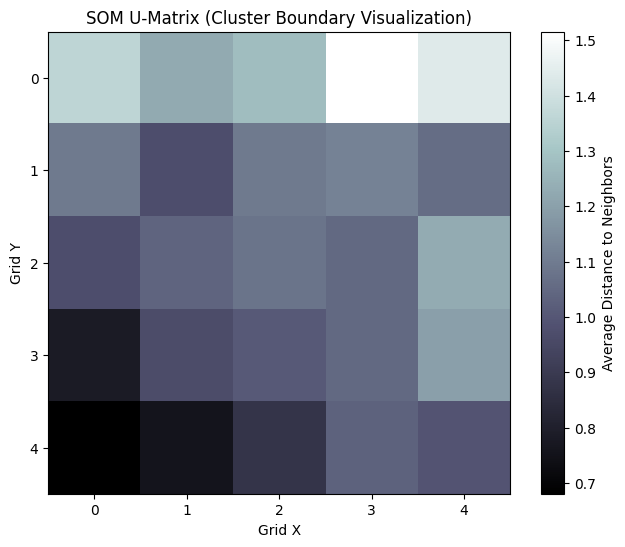

In [11]:
som.plot_umatrix()

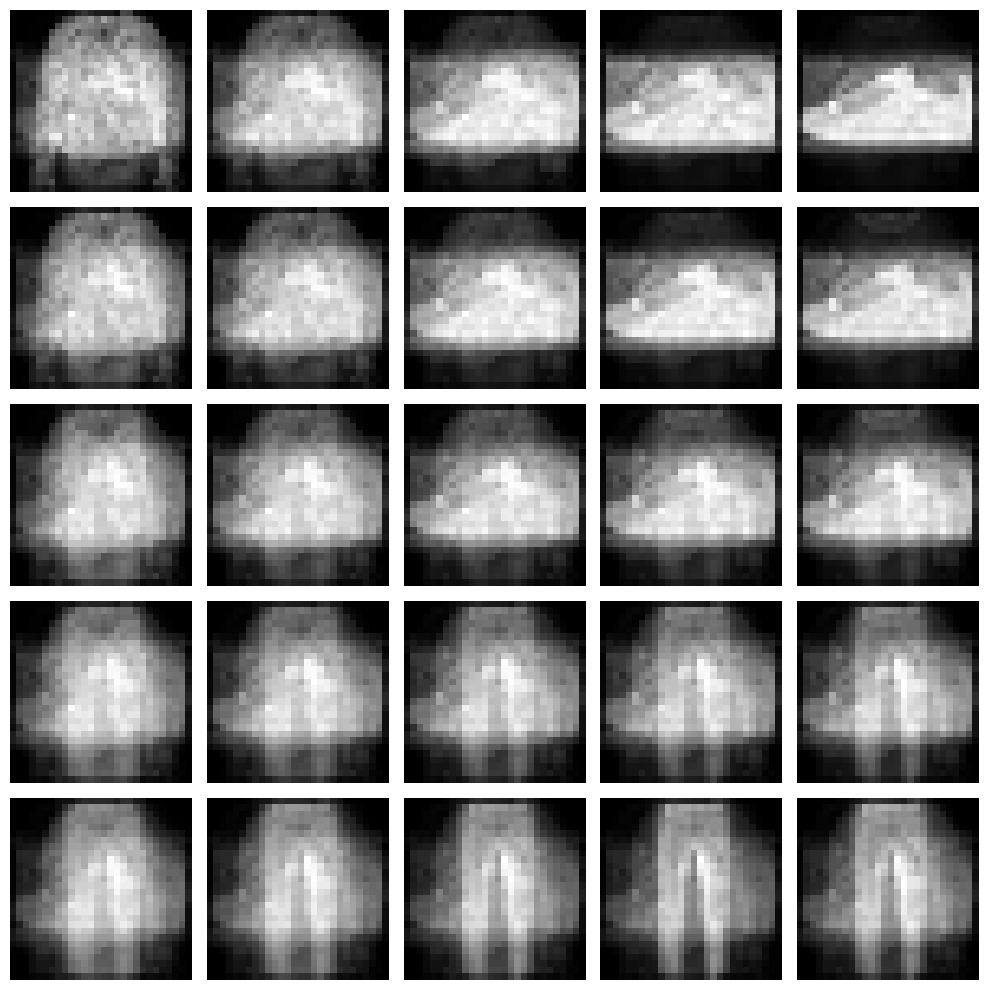

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.flatten()

for ax, neuron_weights in zip(axes, som.weights_.reshape(-1, 784)):
    img = neuron_weights.reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [13]:
som.inertia_

3048271.4336055024